<a href="https://colab.research.google.com/github/viniavena/general-studies/blob/main/someProbabilityStudies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import signal

!pip install 

#Initials


##Flipping coins

In [ ]:
def coin_trail():
  heads = 0
  for i in range(100):
    if random.random() <=0.5:
      heads += 1
    
  return heads

def coin_simulation(n):
  trials = []
  for i in range(n):
    trials.append(coin_trail())

  return trials

def average_heads(n):
  heads = coin_simulation(n)
  return (sum(heads)/n)

def heads_distribution(n):
  heads = coin_simulation(n)
  plt.hist(heads)
  plt.show()

def central_value_theorem():
  for i in range(7):
    number = 10**i
    print('\n\n', number)
    heads_distribution(number)





 1


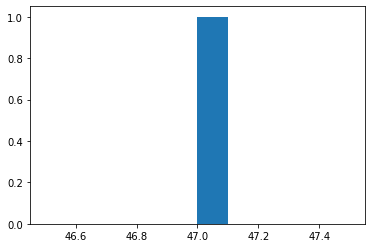



 10


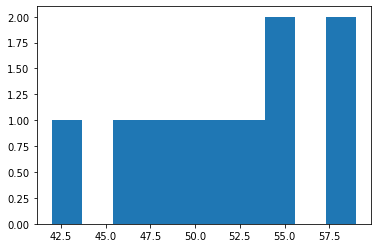



 100


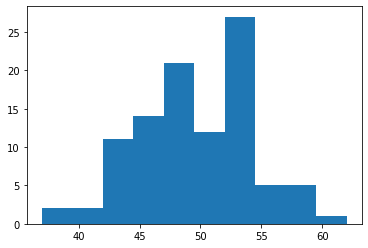



 1000


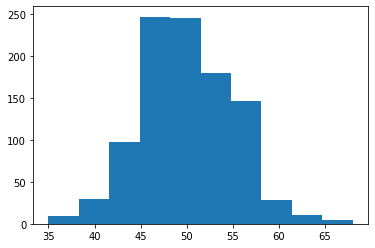



 10000


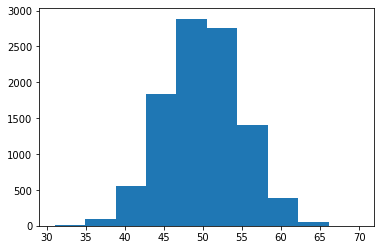



 100000


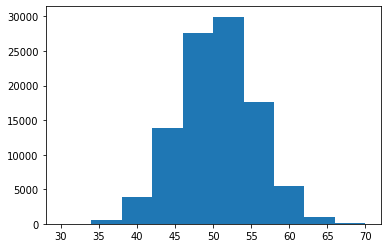



 1000000


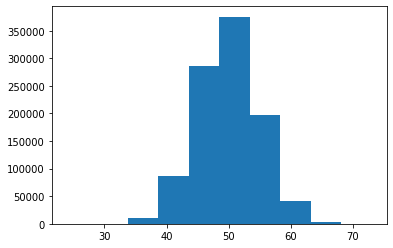

In [ ]:
central_value_theorem()

##Adding some bias to coin

Enter a float value 0 to 1 for heads: 0.7


 100


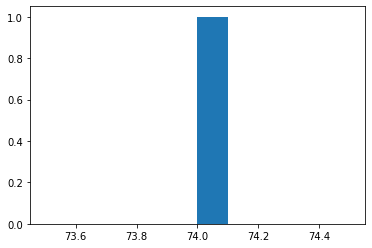



 1000


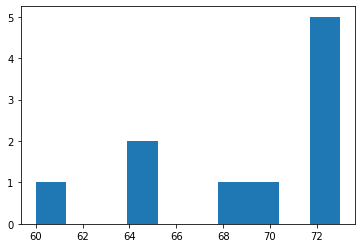



 10000


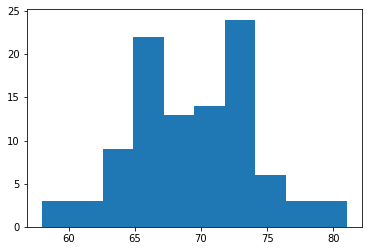



 100000


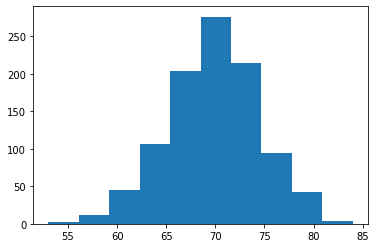



 1000000


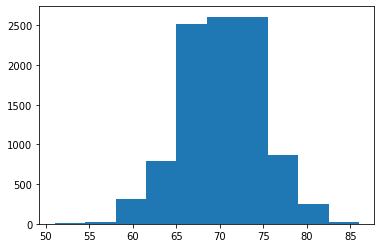

In [ ]:
def vice_coin(bias):
  heads = 0
  for i in range(100):
    if random.random() <=bias:
      heads += 1
    
  return heads


def printing_viced(bias):

  for j in range(5):
    number = 10**j
    print('\n\n', number*100)
    trials = []
    for i in range(number):
      trials.append(vice_coin(bias))
    plt.hist(trials)
    plt.show()


def bias_prompt():
  bias = float(input('Enter a float value 0 to 1 for heads: '))
  if bias > 1:
    print( bias, ' is not valid!')
    bias_prompt()
  else:
    printing_viced(bias)


bias_prompt()

## Rolling dices




 1  plays


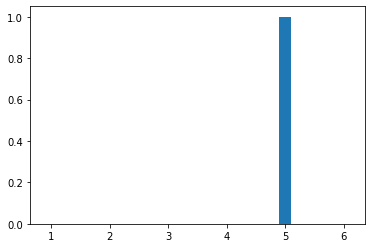



 10  plays


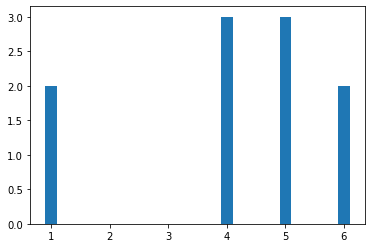



 100  plays


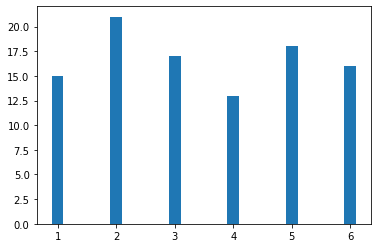



 1000  plays


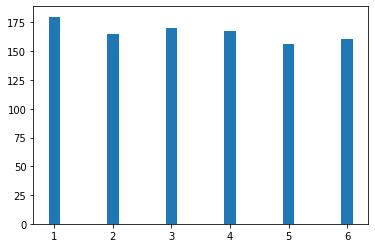



 10000  plays


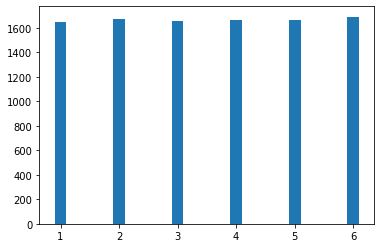



 100000  plays


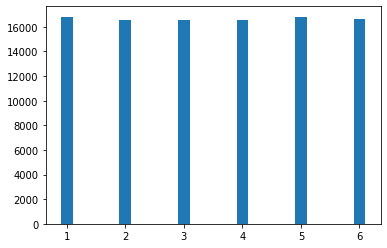

In [ ]:
def single_roll():
  face = random.randint(1,6)
  return face

def multiple_roll(n):
  results = []
  for i in range(n):
    results.append(single_roll())
  
  return results

multiple_roll(10)

def analysys_results():
  x = np.arange(1,7)
  for i in range(6):
    number_of_plays = 10**i
    results = multiple_roll(number_of_plays)
    results_group = [0,0,0,0,0,0]
    for i in results:
      if i == 1:
        results_group[0] += 1
      elif i == 2:
        results_group[1] += 1
      elif i == 3:
        results_group[2] += 1
      elif i == 4:
        results_group[3] += 1
      elif i == 5:
        results_group[4] += 1
      else:
        results_group[5] += 1
      
    print('\n\n', number_of_plays, ' plays')
    plt.bar(x,results_group, width=0.2)
    plt.show()

analysys_results()
    

# Stochastic Dice Roll


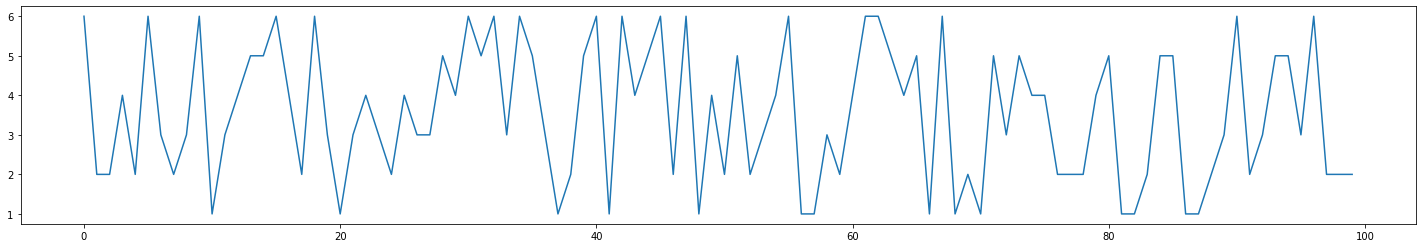

In [ ]:
def times_series(time):
  results = []
  for i in range(time):
    results.append(single_roll())
  return results

serie = times_series(100)

def plot_process(process):
  x_axis = np.arange(len(process))
  f = plt.figure()
  f.set_figwidth(25)
  f.set_figheight(4)
  plt.plot(x_axis, process)
  plt.show

plot_process(serie)

## Random Variable


In [ ]:
dice = times_series(10000)

def probability_faceX(rolls, face):
  faceX  = 0
  for i in rolls:
    if i == face:
      faceX += 1
  # return faceX/len(rolls) 
  return 1/6


dice_faces = [1,2,3,4,5,6]
def dice_cdf(rolls):
  probs = []
  for face in dice_faces:
    probs.append(probability_faceX(rolls,face))
  
  cdf = []
  for i in range(len(probs)):
    if i > 0:
      cdf.append(probs[i]+cdf[i-1])
    else: 
      cdf.append(probs[i])
  return cdf

def dice_pdf(rolls):
  pdf = []
  for face in dice_faces:
    pdf.append(probability_faceX(rolls,face))
  return pdf

dice_pdf(dice)


[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

## Cross Probability


In [ ]:
def cross_probability(dice1, dice2):
  pdfX = dice_pdf(dice1)
  pdfY = dice_pdf(dice2)
  prob_table = np.zeros((len(pdfX), len(pdfY)))
  for n in range(len(pdfX)):
    for m in range(len(pdfY)):
      prob_table[n][m] = pdfX[n]*pdfY[m]
  return prob_table


dice1 = times_series(10000)
dice2 = times_series(10000)

cross_probability(dice1,dice2)



array([[0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
        0.02777778],
       [0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
        0.02777778],
       [0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
        0.02777778],
       [0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
        0.02777778],
       [0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
        0.02777778],
       [0.02777778, 0.02777778, 0.02777778, 0.02777778, 0.02777778,
        0.02777778]])

TypeError: ignored

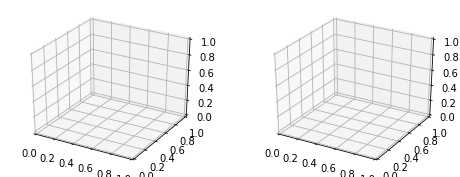

In [ ]:

z_axis = cross_probability(dice1,dice2)

# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x_axis = np.arange(1,7)
y_axis = np.arange(1,7)
_xx, _yy = np.meshgrid(x_axis, y_axis)
x, y = _xx.ravel(), _yy.ravel()

top = dice_pdf(dice1)[x]*dice_pdf(dice2)[y]
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()




## Auto Correlation

In [ ]:
def dice_expected_value(process):
  honest_dice_prob = 1/6
  n = len(process)
  return n*honest_dice_prob

# dice_expected_value(serie)

def dice_auto_correlation(process, lag):
  index = 0
  acf = []
  while (index + lag + 1) < len(process):
    x = process[index]
    x_lag = process[index+lag]
    avg = (x+x_lag)/2
    acf.append(avg)
    index += 1
  return acf

# realization = times_series(5)

# print(realization)
# auto_correlation(realization,1)

## Multiple Process

In [ ]:
def process_dices(n):
  results = []
  for i in range(n):
    results.append(single_roll())  
  return results

def multiple_process(n, k):
  process = []
  for i in range(n):
    process.append(process_dices(k))
  return process

multiples = multiple_process(5,20)

def print_single_process():
  for i in range(len(multiples)):
    plot_process(multiples[i])


def find_expected_value(processes):
  expected_values = []
  A = np.array(processes)
  transposed = A.transpose()
  for i in range(len(transposed)):
    avg = sum(transposed[i])/(len(transposed[i]))
    expected_values.append(avg)
  return expected_values


[4, 4, 6, 6, 5, 5, 4, 5, 5, 6, 2, 6, 4, 1, 4, 3, 4, 2, 2, 5]
[1, 6, 4, 6, 6, 5, 1, 3, 2, 5, 5, 1, 3, 5, 6, 1, 5, 6, 1, 6]
[1, 2, 1, 4, 1, 4, 1, 5, 2, 5, 1, 5, 6, 2, 6, 4, 3, 5, 6, 5]
[1, 4, 5, 1, 3, 5, 1, 5, 6, 1, 3, 1, 6, 5, 6, 4, 2, 6, 5, 5]
[4, 2, 1, 1, 4, 5, 5, 3, 5, 3, 4, 6, 1, 5, 6, 4, 3, 1, 5, 6]
